## Load the model

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
import gensim.models as g
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA as sklearnPCA

In [3]:
model="./model/doc2vec.bin"

#inference hyper-parameters
start_alpha=0.01
infer_epoch=1000

#load model
m = g.Doc2Vec.load(model)

In [4]:
v = m.infer_vector(['paper'], alpha=start_alpha, steps=infer_epoch)

In [6]:
print(len(v))

300


In [3]:
r = open('../Preprocess_venue/venues_final.json','r',encoding='utf-8')
w = open('doc2vecResult.json','w',encoding='utf-8')
X = []
    
for line in r:
    vector = line.split(' ')
    vector = vector[0:len(vector)-1]
    if len(vector) > 1:
        inferred_vector = m.infer_vector(vector, alpha=start_alpha, steps=infer_epoch)
        X.append(inferred_vector)
    
        for element in inferred_vector:
            w.write(str(element))
            w.write(' ')
        w.write('\n')

r.close()
w.close()
X = np.array(X)
np.save('X1000.npy', X) 

In [ ]:
X = np.load('X1000.npy')
print(len(X))

In [9]:
from pyclustering.cluster.dbscan import dbscan
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.utils import read_sample

# Sample for cluster analysis.
sample = X

eps = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]
i = 0
while i < 100:
    min_s = 1
    while min_s < 10:

        dbscan_instance = dbscan(sample, eps[i], min_s)
        dbscan_instance.process()
        clusters = dbscan_instance.get_clusters()
        noise = dbscan_instance.get_noise()
        print(str(eps[i]) + ' ' + str(min_s) + ' clusters=' + str(len(clusters)) + ' noise=' + str(len(noise)))
        min_s += 1
    
    i += 1


1.0 1 clusters=153 noise=2710
1.0 2 clusters=50 noise=2916
1.0 3 clusters=22 noise=3016
1.0 4 clusters=11 noise=3071
1.0 5 clusters=10 noise=3085
1.0 6 clusters=6 noise=3115
1.0 7 clusters=6 noise=3115
1.0 8 clusters=4 noise=3139
1.0 9 clusters=2 noise=3157
1.1 1 clusters=170 noise=2535
1.1 2 clusters=63 noise=2749
1.1 3 clusters=29 noise=2873
1.1 4 clusters=13 noise=2955
1.1 5 clusters=11 noise=2987
1.1 6 clusters=9 noise=3020
1.1 7 clusters=6 noise=3067
1.1 8 clusters=5 noise=3083
1.1 9 clusters=5 noise=3097
1.2 1 clusters=178 noise=2290
1.2 2 clusters=69 noise=2508
1.2 3 clusters=37 noise=2645
1.2 4 clusters=16 noise=2768
1.2 5 clusters=11 noise=2815
1.2 6 clusters=11 noise=2843
1.2 7 clusters=10 noise=2854
1.2 8 clusters=7 noise=2914
1.2 9 clusters=4 noise=2958
1.3 1 clusters=165 noise=2031
1.3 2 clusters=67 noise=2227
1.3 3 clusters=43 noise=2350
1.3 4 clusters=31 noise=2456
1.3 5 clusters=14 noise=2572
1.3 6 clusters=12 noise=2625
1.3 7 clusters=13 noise=2662
1.3 8 clusters=10 no

4.4 6 clusters=1 noise=0
4.4 7 clusters=1 noise=0
4.4 8 clusters=1 noise=0
4.4 9 clusters=1 noise=0
4.5 1 clusters=1 noise=0
4.5 2 clusters=1 noise=0
4.5 3 clusters=1 noise=0
4.5 4 clusters=1 noise=0
4.5 5 clusters=1 noise=0
4.5 6 clusters=1 noise=0
4.5 7 clusters=1 noise=0
4.5 8 clusters=1 noise=0
4.5 9 clusters=1 noise=0
4.6 1 clusters=1 noise=0
4.6 2 clusters=1 noise=0
4.6 3 clusters=1 noise=0
4.6 4 clusters=1 noise=0
4.6 5 clusters=1 noise=0
4.6 6 clusters=1 noise=0
4.6 7 clusters=1 noise=0
4.6 8 clusters=1 noise=0
4.6 9 clusters=1 noise=0
4.7 1 clusters=1 noise=0
4.7 2 clusters=1 noise=0
4.7 3 clusters=1 noise=0
4.7 4 clusters=1 noise=0
4.7 5 clusters=1 noise=0
4.7 6 clusters=1 noise=0
4.7 7 clusters=1 noise=0
4.7 8 clusters=1 noise=0
4.7 9 clusters=1 noise=0
4.8 1 clusters=1 noise=0
4.8 2 clusters=1 noise=0
4.8 3 clusters=1 noise=0
4.8 4 clusters=1 noise=0
4.8 5 clusters=1 noise=0
4.8 6 clusters=1 noise=0
4.8 7 clusters=1 noise=0
4.8 8 clusters=1 noise=0
4.8 9 clusters=1 noise=0


KeyboardInterrupt: 

In [10]:
min_s = 1
eps = 3.2
clustering_vis = DBSCAN(eps=eps, min_samples=min_s).fit(X)

cl_vis = clustering_vis.labels_
l_vis = []
for element in cl_vis:
    if element not in l_vis:
        l_vis.append(element)
print(' nr_clusters=' + str(len(l_vis)) )

 nr_clusters=2


In [ ]:
with open("projector-tensorboard/log-2.9-1/cl.tsv", "w") as f:
    for elem in cl:
        print(str(elem), file=f)

In [25]:
with open("output2.tsv", "w") as f:
    i = 0
    for x in X:
        strline = ""
        for elem in x:
            strline = strline + str(elem) + "\t"
        strline = strline
        print(strline, file=f)
        i = i+1
    print(i)
#print(X[0])

3183


In [22]:
clustering = DBSCAN(eps=2.7, min_samples=2).fit(X)
cl = clustering.labels_
with open("projector-tensorboard/log-1/output2cl.tsv", "w") as f:
    for elem in cl:
        print(str(elem), file=f)

# Hierarchy clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=72, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 

array([31,  9,  0, ...,  5,  7,  7], dtype=int64)

In [26]:
clust = cluster.fit_predict(X) 
with open("projector-tensorboard/log-1/output2cl.tsv", "w") as f:
    for elem in clust:
        print(str(elem), file=f)

# For Tensorboard

In [11]:
PATH = os.getcwd()

LOG_DIR = PATH + '/projector-tensorboard/log-1/'

metadata = os.path.join(LOG_DIR, 'output2cl.tsv')

pca = sklearnPCA(n_components=50) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

with tf.Session() as sess:
    saver = tf.train.Saver([tf_data])
    sess.run(tf.global_variables_initializer())
    saver.save(sess, os.path.join(LOG_DIR, 'tf_data.ckpt'))
    config = projector.ProjectorConfig()
    
    embedding = config.embeddings.add()
    embedding.tensor_name = tf_data.name
    
    embedding.metadata_path = metadata
    
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

Instructions for updating:
Colocations handled automatically by placer.


In [33]:
pca = sklearnPCA(n_components=50) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))


In [34]:
transformed = np.array(transformed)
print(transformed[0])

[-0.4514514  -0.8970818  -0.5427182   0.280583    0.32324618  0.36332858
  0.89380044  0.17968972 -0.3282872   0.16508476  0.34474862  0.15171908
 -0.07575375 -0.58325964  0.21215254 -0.8442374   0.22676082 -0.28760123
  0.12260294 -0.01905518 -0.12728168  0.04444432 -0.19466023 -0.21238996
  0.01315045 -0.28498283  0.00901939 -0.1185576   0.10274967  0.24984224
  0.07525621 -0.01458099 -0.21885602 -0.11952911 -0.18631175  0.06916519
 -0.3460794  -0.08657125  0.03402223 -0.00292605 -0.16791156  0.09601615
 -0.14634167 -0.03025275  0.08442162 -0.02770769  0.07381632 -0.06703213
 -0.08358905 -0.206986  ]


In [35]:
with open("outputPCA50.tsv", "w") as f:
    for x in transformed:
        strline = ""
        for elem in x:
            strline = strline + str(elem) + "\t"
        strline = strline + "\n"
        print(strline, file=f)

In [ ]:
class0 = []
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []

i = 0
for elem in cl:
    if elem == -1:
        class0.append(transformed[i])
    if elem == 0:
        class1.append(transformed[i])
    if elem == 1:
        class2.append(transformed[i])
    if elem == 2:
        class3.append(transformed[i])
    if elem == 3:
        class4.append(transformed[i])
    if elem == 4:
        class5.append(transformed[i])
    i = i + 1
    
print(len(transformed))
print(len(class0) +len(class1) +len(class2) +len(class3)+len(class4)+len(class5))

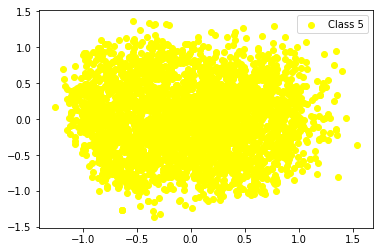

In [86]:
# plt.scatter(class0[:][0], class0[:][1], label='Class 0', c='red')
# plt.scatter(class1[:][0], class1[:][1], label='Class 1', c='green')
# plt.scatter(class2[:][0], class2[:][1], label='Class 2', c='blue')
# plt.scatter(class3[:][0], class3[:][1], label='Class 3', c='orange')
# plt.scatter(class4[:][0], class4[:][1], label='Class 4', c='pink')
# plt.scatter(class5[:][0], class5[:][1], label='Class 5', c='yellow')

# plt.legend()
# plt.show()

plt.scatter(transformed[:][0], transformed[:][1], label='Class 5', c='yellow')
plt.legend()
plt.show()

## LDA

In [87]:
lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, cl))

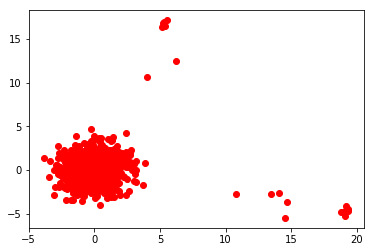

In [88]:
plt.scatter(lda_transformed[:][0], lda_transformed[:][1], label='Class 0', c='red')

In [13]:
eps = [1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]
i = 0
while i < 100:
    min_s = 1
    while min_s < 10:
        clustering = DBSCAN(eps=eps[i], min_samples=min_s).fit(X)
        l = []
        cl = clustering.labels_
        min_ones = 0
        for element in cl:
            if element == -1:
                min_ones = min_ones + 1
            if element not in l:
                l.append(element)
        print('eps=' + str(eps[i]) + ' min_s=' + str(min_s) + ' nr_clusters=' + str(len(l)) + ' nr_-1=' + str(min_ones))
        min_s = min_s + 1
    i = i + 1

eps=1.1 min_s=1 nr_clusters=3115 nr_-1=0
eps=1.1 min_s=2 nr_clusters=57 nr_-1=3059
eps=1.1 min_s=3 nr_clusters=6 nr_-1=3161
eps=1.1 min_s=4 nr_clusters=4 nr_-1=3167
eps=1.1 min_s=5 nr_clusters=3 nr_-1=3171
eps=1.1 min_s=6 nr_clusters=3 nr_-1=3171
eps=1.1 min_s=7 nr_clusters=1 nr_-1=3183
eps=1.1 min_s=8 nr_clusters=1 nr_-1=3183
eps=1.1 min_s=9 nr_clusters=1 nr_-1=3183
eps=1.2 min_s=1 nr_clusters=3097 nr_-1=0
eps=1.2 min_s=2 nr_clusters=68 nr_-1=3030
eps=1.2 min_s=3 nr_clusters=11 nr_-1=3144
eps=1.2 min_s=4 nr_clusters=5 nr_-1=3163
eps=1.2 min_s=5 nr_clusters=3 nr_-1=3171
eps=1.2 min_s=6 nr_clusters=3 nr_-1=3171
eps=1.2 min_s=7 nr_clusters=1 nr_-1=3183
eps=1.2 min_s=8 nr_clusters=1 nr_-1=3183
eps=1.2 min_s=9 nr_clusters=1 nr_-1=3183
eps=1.3 min_s=1 nr_clusters=3066 nr_-1=0
eps=1.3 min_s=2 nr_clusters=90 nr_-1=2977
eps=1.3 min_s=3 nr_clusters=20 nr_-1=3117
eps=1.3 min_s=4 nr_clusters=5 nr_-1=3163
eps=1.3 min_s=5 nr_clusters=3 nr_-1=3171
eps=1.3 min_s=6 nr_clusters=3 nr_-1=3171
eps=1.3 min

eps=3.5 min_s=2 nr_clusters=20 nr_-1=314
eps=3.5 min_s=3 nr_clusters=5 nr_-1=344
eps=3.5 min_s=4 nr_clusters=3 nr_-1=354
eps=3.5 min_s=5 nr_clusters=2 nr_-1=365
eps=3.5 min_s=6 nr_clusters=2 nr_-1=370
eps=3.5 min_s=7 nr_clusters=2 nr_-1=376
eps=3.5 min_s=8 nr_clusters=2 nr_-1=381
eps=3.5 min_s=9 nr_clusters=2 nr_-1=384
eps=3.6 min_s=1 nr_clusters=268 nr_-1=0
eps=3.6 min_s=2 nr_clusters=18 nr_-1=251
eps=3.6 min_s=3 nr_clusters=4 nr_-1=279
eps=3.6 min_s=4 nr_clusters=3 nr_-1=283
eps=3.6 min_s=5 nr_clusters=2 nr_-1=298
eps=3.6 min_s=6 nr_clusters=2 nr_-1=298
eps=3.6 min_s=7 nr_clusters=2 nr_-1=300
eps=3.6 min_s=8 nr_clusters=2 nr_-1=304
eps=3.6 min_s=9 nr_clusters=2 nr_-1=305
eps=3.7 min_s=1 nr_clusters=230 nr_-1=0
eps=3.7 min_s=2 nr_clusters=14 nr_-1=217
eps=3.7 min_s=3 nr_clusters=2 nr_-1=241
eps=3.7 min_s=4 nr_clusters=2 nr_-1=244
eps=3.7 min_s=5 nr_clusters=2 nr_-1=252
eps=3.7 min_s=6 nr_clusters=2 nr_-1=258
eps=3.7 min_s=7 nr_clusters=2 nr_-1=258
eps=3.7 min_s=8 nr_clusters=2 nr_-1=2

KeyboardInterrupt: 

In [12]:
from pyclustering.cluster.dbscan import dbscan
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.utils import read_sample

# Sample for cluster analysis.
sample = X

eps = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
      2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,
      3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,
      4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,
      5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,
      6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,
      7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,
      8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,
      9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,
      10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9]
i = 0
while i < 100:
    min_s = 1
    while min_s < 10:

        dbscan_instance = dbscan(sample, eps[i], min_s)
        dbscan_instance.process()
        clusters = dbscan_instance.get_clusters()
        noise = dbscan_instance.get_noise()
        print(str(eps[i]) + ' ' + str(min_s) + ' clusters=' + str(len(clusters)) + ' noise=' + str(len(noise)))
        min_s += 1
    
    i += 1


1.0 1 clusters=50 noise=3071
1.0 2 clusters=5 noise=3161
1.0 3 clusters=3 noise=3167
1.0 4 clusters=2 noise=3171
1.0 5 clusters=2 noise=3171
1.0 6 clusters=0 noise=3183
1.0 7 clusters=0 noise=3183
1.0 8 clusters=0 noise=3183
1.0 9 clusters=0 noise=3183
1.1 1 clusters=56 noise=3059
1.1 2 clusters=5 noise=3161
1.1 3 clusters=3 noise=3167
1.1 4 clusters=2 noise=3171
1.1 5 clusters=2 noise=3171
1.1 6 clusters=0 noise=3183
1.1 7 clusters=0 noise=3183
1.1 8 clusters=0 noise=3183
1.1 9 clusters=0 noise=3183
1.2 1 clusters=67 noise=3030
1.2 2 clusters=10 noise=3144
1.2 3 clusters=4 noise=3163
1.2 4 clusters=2 noise=3171
1.2 5 clusters=2 noise=3171
1.2 6 clusters=0 noise=3183
1.2 7 clusters=0 noise=3183
1.2 8 clusters=0 noise=3183
1.2 9 clusters=0 noise=3183
1.3 1 clusters=89 noise=2977
1.3 2 clusters=19 noise=3117
1.3 3 clusters=4 noise=3163
1.3 4 clusters=2 noise=3171
1.3 5 clusters=2 noise=3171
1.3 6 clusters=0 noise=3183
1.3 7 clusters=0 noise=3183
1.3 8 clusters=0 noise=3183
1.3 9 clusters

4.2 7 clusters=1 noise=81
4.2 8 clusters=1 noise=82
4.2 9 clusters=1 noise=83
4.3 1 clusters=3 noise=55
4.3 2 clusters=1 noise=59
4.3 3 clusters=1 noise=61
4.3 4 clusters=1 noise=63
4.3 5 clusters=1 noise=63
4.3 6 clusters=1 noise=64
4.3 7 clusters=1 noise=65
4.3 8 clusters=1 noise=65
4.3 9 clusters=1 noise=65
4.4 1 clusters=2 noise=41
4.4 2 clusters=1 noise=43
4.4 3 clusters=1 noise=45
4.4 4 clusters=1 noise=46
4.4 5 clusters=1 noise=47
4.4 6 clusters=1 noise=47
4.4 7 clusters=1 noise=47
4.4 8 clusters=1 noise=48
4.4 9 clusters=1 noise=48
4.5 1 clusters=2 noise=33
4.5 2 clusters=1 noise=35
4.5 3 clusters=1 noise=37
4.5 4 clusters=1 noise=38
4.5 5 clusters=1 noise=38
4.5 6 clusters=1 noise=38
4.5 7 clusters=1 noise=39
4.5 8 clusters=1 noise=39
4.5 9 clusters=1 noise=39
4.6 1 clusters=2 noise=28
4.6 2 clusters=1 noise=30
4.6 3 clusters=1 noise=30
4.6 4 clusters=1 noise=32
4.6 5 clusters=1 noise=32
4.6 6 clusters=1 noise=32
4.6 7 clusters=1 noise=32
4.6 8 clusters=1 noise=32
4.6 9 cluste

KeyboardInterrupt: 